<a href="https://colab.research.google.com/github/PervejHosen/Python_Projects/blob/main/Project_03_(A_B_Testing_using_Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B Testing in Python**

## Concepts of A/B Testing:

In this notebook, the necesarry statistical steps of A/B Testing and interpretation of the results of the hypothesis tests that are used in A/B Testing process will be shown:

* A/B Testing method cover the statistical hypothesis tests are used to reveal significance of the difference in a metric variable values between two groups such as Group A and Group B.

* There are two statistical methods to test the significance as Independent Samples t Test and Mann-Whitney U Test.

* According to result of 1. Step: Testing the Normality Assumption, it is decided between two alternative methods.

## A/B Testing Steps:

**1. Step: Testing the Normality Assumption**

It is necesarry to decide which way of testing the significany of difference will be choosen. Shaphiro Wilks test is a way to test if the serie has normal distribution or not. Also a Box Plot might be helpfull to observe if the serie has outliers or not. According to result of the test it can be decided between Independent Samples t Test and Mann-Whitney U Test.

If p value of the test is greater than .05 A/B Testing method will be Independent Samples t Test.

In addition Independent Samples t Test requires another assumption which is Homogeneity, so if the result is normal then you can follow **2. Step: Testing the Homogeneity Assumption.**

If p value of the test is less than .05 A/B Testing method will be Mann-Whitney U Test.

In addition Mann-Whitney U Test does not require any other assumptions, so if the result is not normal then you can jump to **3. Step: Alternative 2 -> Mann-Whitney U Test.**

**2. Step: Testing the Homogeneity Assumption**

This assumption is only relevant in the case of normal distribution. It is necesarry to decide which code setting will be choosen while executing the **3. Step: Alternative 1 -> Independent Samples t Test.**

If p value of the test is greater than .05 Independent Samples t Test will be done with "equal_var=True" extention.

If p value of the test is less than .05 Independent Samples t Test will be done with "equal_var=False" extention.

**3. Step: Alternative 1 -> Independent Samples t Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the means of two groups of data.

**3. Step: Alternative 2 -> Mann-Whitney U Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the distributions of two groups of data.

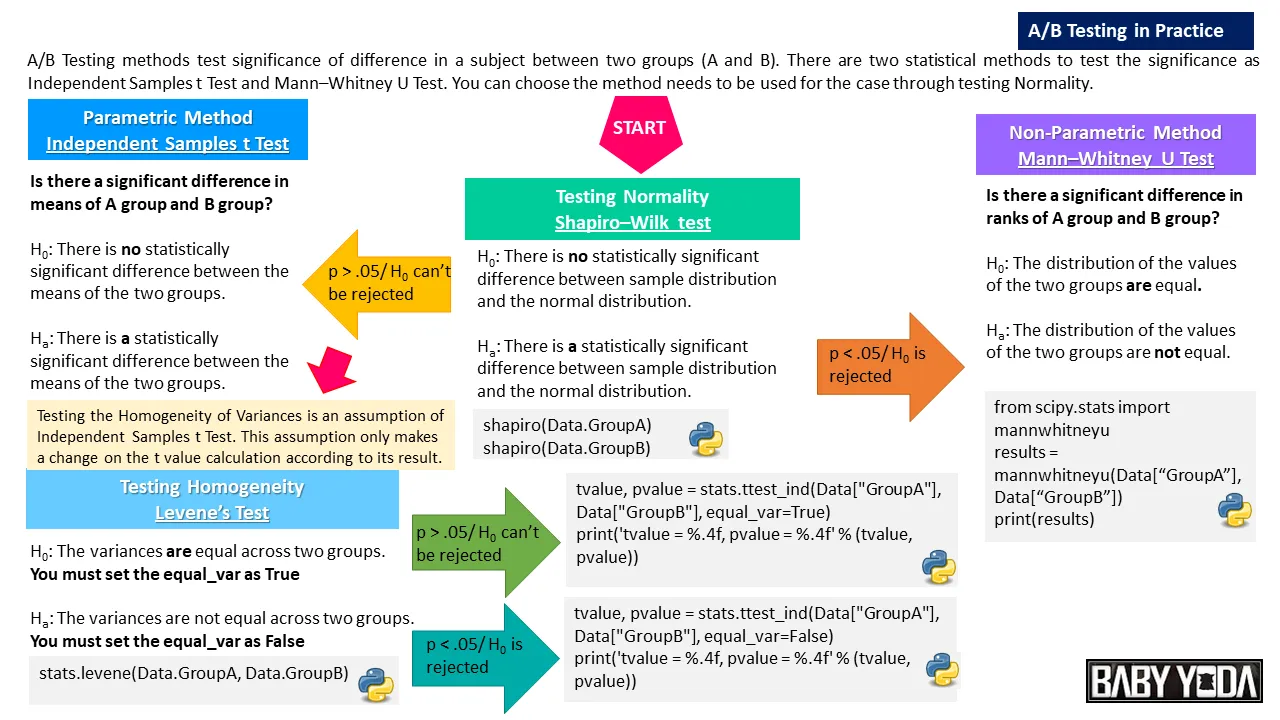

# Practical implications

## **01. Objectives**
In this study it is aimed to reveal whether there is a **significant difference** in the **performance variables** provided for two SEO (Search Engine Optimization)/Digital Marketing Campaign.


## **02. Dataset Description**
Dataset contains 4 different metric variables observed during one month: Purchase, Impression, Earning, Click

## **03. Necessasry Libraries**

In [1]:
# Importing the required Libraries
import statistics
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

from termcolor import colored

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

## **04. Loading & Reading the dataset**

In [2]:
#Importing the Datasets: Two sets are stored in different sheets of excel
DataGroupA = pd.read_excel("/content/drive/MyDrive/Python/Datasets/ab_testing_data.xlsx" , sheet_name= "Control Group")
DataGroupB = pd.read_excel("/content/drive/MyDrive/Python/Datasets/ab_testing_data.xlsx" , sheet_name= "Test Group")

**Reading DataGroupA**

In [3]:
DataGroupA.head()

,Impression,Click,Purchase,Earning
0,82529,6090,6090,2311.28
1,98050,3383,3383,1742.81
2,82696,4168,4168,1797.83
3,109914,4911,4911,1696.23
4,108458,5988,5988,1543.72


In [4]:
DataGroupA.shape

(40, 4)

In [5]:
DataGroupA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     int64  
 1   Click       40 non-null     int64  
 2   Purchase    40 non-null     int64  
 3   Earning     40 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [6]:
DataGroupA.describe()

,Impression,Click,Purchase,Earning
count,40.000000,40.000000,40.000000,40.000000
mean,101711.450000,5100.625000,5100.625000,1908.568000
std,20302.122984,1329.957772,1329.957772,302.917267
min,45476.000000,2190.000000,2190.000000,1253.990000
25%,85726.750000,4124.250000,4124.250000,1685.847500
50%,99790.500000,5001.500000,5001.500000,1975.160000
75%,115212.500000,5923.500000,5923.500000,2119.800000
max,147539.000000,7959.000000,7959.000000,2497.300000


**Reading DataGroupB**

In [7]:
DataGroupB.head()

,Impression,Click,Purchase,Earning
0,120104,3217,703,1939.61
1,134776,3636,835,2929.41
2,107807,3058,423,2526.24
3,116446,4651,430,2281.43
4,145083,5202,750,2781.70


In [8]:
# reading all at once
print("Row, Column:")
print(DataGroupB.shape,"\n")

print("Dataset Information:","\n")
DataGroupB.info(),"\n"

print("Summary Statistics of the Test Group:","\n")
print(DataGroupB.describe())

Row, Column:
(40, 4) 

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     int64  
 1   Click       40 non-null     int64  
 2   Purchase    40 non-null     int64  
 3   Earning     40 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB
Summary Statistics of the Test Group: 

          Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.875000  3968.050000  582.600000  2514.890000
std     18807.479354   923.141291  161.145706   282.730983
min     79034.000000  1837.000000  312.000000  1939.610000
25%    112692.250000  3377.500000  445.000000  2280.537500
50%    119291.500000  3932.000000  552.000000  2544.665000
75%    132051.000000  4661.000000  700.500000  2761.545000
max    158606.000000  6020.000000  890.00000

## **05. Feature Engineering**


**Conversion Rate**

In [9]:
#Feature Engineering: Conversion Rate
DataGroupA["Conversion Rate"] = DataGroupA["Purchase"]/DataGroupA["Click"]*100
print(DataGroupA.head(),"\n")

DataGroupB["Conversion Rate"] = DataGroupB["Purchase"]/DataGroupB["Click"]*100
print(DataGroupB.head())

   Impression  Click  Purchase  Earning  Conversion Rate
0       82529   6090      6090  2311.28            100.0
1       98050   3383      3383  1742.81            100.0
2       82696   4168      4168  1797.83            100.0
3      109914   4911      4911  1696.23            100.0
4      108458   5988      5988  1543.72            100.0 

   Impression  Click  Purchase  Earning  Conversion Rate
0      120104   3217       703  1939.61        21.852658
1      134776   3636       835  2929.41        22.964796
2      107807   3058       423  2526.24        13.832570
3      116446   4651       430  2281.43         9.245324
4      145083   5202       750  2781.70        14.417532


**Earning per Purchase**

In [10]:
#Feature Engineering: Earning per Purchase

DataGroupA["Earning per Purchase"] = DataGroupA["Earning"]/DataGroupA["Purchase"]*100
print(DataGroupA.head(),"\n")

DataGroupB["Earning per Purchase"] = DataGroupB["Earning"]/DataGroupB["Purchase"]*100
print(DataGroupB.head())

   Impression  Click  Purchase  Earning  Conversion Rate  Earning per Purchase
0       82529   6090      6090  2311.28            100.0             37.952053
1       98050   3383      3383  1742.81            100.0             51.516701
2       82696   4168      4168  1797.83            100.0             43.134117
3      109914   4911      4911  1696.23            100.0             34.539401
4      108458   5988      5988  1543.72            100.0             25.780227 

   Impression  Click  Purchase  Earning  Conversion Rate  Earning per Purchase
0      120104   3217       703  1939.61        21.852658            275.904694
1      134776   3636       835  2929.41        22.964796            350.827545
2      107807   3058       423  2526.24        13.832570            597.219858
3      116446   4651       430  2281.43         9.245324            530.565116
4      145083   5202       750  2781.70        14.417532            370.893333


## **06. Data Manipulation**


**Indication of Groups in A New Variable**

In [11]:
#Indication of Groups in A New Variable
DataGroupA["Group"] = "GroupA"
print(DataGroupA.head()),"\n"

DataGroupB["Group"] = "GroupB"
print(DataGroupB.head())

   Impression  Click  Purchase  Earning  Conversion Rate  \
0       82529   6090      6090  2311.28            100.0   
1       98050   3383      3383  1742.81            100.0   
2       82696   4168      4168  1797.83            100.0   
3      109914   4911      4911  1696.23            100.0   
4      108458   5988      5988  1543.72            100.0   

   Earning per Purchase   Group  
0             37.952053  GroupA  
1             51.516701  GroupA  
2             43.134117  GroupA  
3             34.539401  GroupA  
4             25.780227  GroupA  
   Impression  Click  Purchase  Earning  Conversion Rate  \
0      120104   3217       703  1939.61        21.852658   
1      134776   3636       835  2929.41        22.964796   
2      107807   3058       423  2526.24        13.832570   
3      116446   4651       430  2281.43         9.245324   
4      145083   5202       750  2781.70        14.417532   

   Earning per Purchase   Group  
0            275.904694  GroupB  
1     

## **07. Combining the Datasets**

In [12]:
#Combining the Datasets
Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)
print(Data.head()),
print(Data.tail())

   Impression  Click  Purchase  Earning  Conversion Rate  \
0       82529   6090      6090  2311.28            100.0   
1       98050   3383      3383  1742.81            100.0   
2       82696   4168      4168  1797.83            100.0   
3      109914   4911      4911  1696.23            100.0   
4      108458   5988      5988  1543.72            100.0   

   Earning per Purchase   Group  
0             37.952053  GroupA  
1             51.516701  GroupA  
2             43.134117  GroupA  
3             34.539401  GroupA  
4             25.780227  GroupA  
    Impression  Click  Purchase  Earning  Conversion Rate  \
75       79235   6003       383  2277.86         6.380143   
76      130703   3627       450  2530.84        12.406948   
77      116482   4703       473  2597.92        10.057410   
78       79034   4496       426  2595.86         9.475089   
79      102258   4801       522  2967.52        10.872735   

    Earning per Purchase   Group  
75            594.741514  GroupB 

In [13]:
print(Data)

    Impression  Click  Purchase  Earning  Conversion Rate  \
0        82529   6090      6090  2311.28       100.000000   
1        98050   3383      3383  1742.81       100.000000   
2        82696   4168      4168  1797.83       100.000000   
3       109914   4911      4911  1696.23       100.000000   
4       108458   5988      5988  1543.72       100.000000   
..         ...    ...       ...      ...              ...   
75       79235   6003       383  2277.86         6.380143   
76      130703   3627       450  2530.84        12.406948   
77      116482   4703       473  2597.92        10.057410   
78       79034   4496       426  2595.86         9.475089   
79      102258   4801       522  2967.52        10.872735   

    Earning per Purchase   Group  
0              37.952053  GroupA  
1              51.516701  GroupA  
2              43.134117  GroupA  
3              34.539401  GroupA  
4              25.780227  GroupA  
..                   ...     ...  
75            594.7415

# **A/B Testing for Convertion Rate:**

In [14]:
print("Summary Statistics by Groups for Conversion Rate:","\n")

result3 = Data.groupby("Group")["Conversion Rate"].aggregate(["count","mean","std","median","min","max"])
result4 = result3.transpose()
print("Conversion Rate:", "\n")
print(result4)

Summary Statistics by Groups for Conversion Rate: 

Conversion Rate: 

Group   GroupA     GroupB
count     40.0  40.000000
mean     100.0  15.667729
std        0.0   6.816698
median   100.0  14.619228
min      100.0   6.380143
max      100.0  44.801306


Histogram by Groups for Conversion Rate 



<ipython-input-15-6ff4532bf58a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-15-6ff4532bf58a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fu

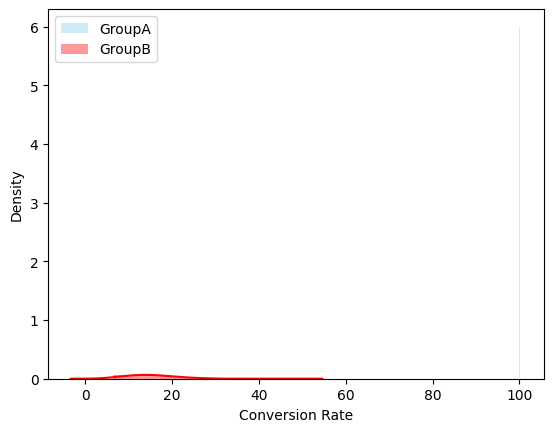

In [15]:
print("Histogram by Groups for Conversion Rate", "\n")
#sns.displot(Data, x=x, hue="Group", element="step", kde=True)
#plt.show()
sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
sns.distplot( DataGroupB["Conversion Rate"] , color="red", label="GroupB")
plt.legend()
plt.show()

Box Plot by Groups for Conversion Rate: 



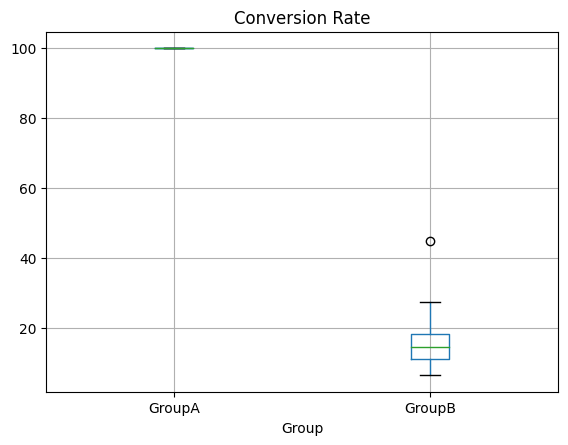

In [16]:
Data.boxplot("Conversion Rate", by="Group",return_type=None)
plt.suptitle("")
print("Box Plot by Groups for Conversion Rate:", "\n")
plt.show()

In [ ]:
print("1. Step: Testing the Normality Assumption for Conversion Rate: ", "\n")

GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(DataGroupA["Conversion Rate"])
GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(DataGroupB["Convertion Rate"])
print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")

In [ ]:
if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05:
  print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " , "\n",
        "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are likely to be normally distributed.","\n")

if GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
  print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. ", "\n",
                  "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are not likely to be normally distributed.","\n")

if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
  print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " , "\n",
                  "Accordingly, we can check if the conversion rate"+" values in"+" GroupB contain outlier or not","\n")

if GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p > 0.05:
  print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " , "\n",
                "Accordingly, we can check if the conversion rate"+" values in"+" GroupA contain outlier or not","\n")

In [ ]:
print("2. Step: Testing the Homogeneity Assumption for Conversion Rate:","\n")

levene_F, levene_p = stats.levene(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")

In [ ]:
#if levene_p > 0.05:
print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected.", "\n", " Accordingly variances of GroupA and GroupB are equal.","\n")

print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=True)

print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")

In [ ]:
#if levene_p < 0.05:
print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected.", "\n", "Accordingly variances of GroupA and GroupB are not equal.","\n")

print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=False)
print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")


In [ ]:
if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")
else:
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")

In [ ]:
if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")
else:
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")

**Mann-Whitney U Test**
When variable either doesn't follow normal distribution, or the Homogenity (Equal-variance) test is rejected, we perform the Non-parametric Mann-Whitney U Test

In [ ]:
u_value, mannw_test_p = mannwhitneyu(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")

In [ ]:
if mannw_test_p > 0.05:
  print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")
else:
  print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")

In [ ]:
if statistics.median(DataGroupA["Conversion Rate"]) > statistics.median(DataGroupB["Conversion Rate"]):
  print("Median of GroupA in Conversion Rate"+" is significantly greater than GroupB","\n")
else:
  print("Median of GroupB in Conversion Rate"+" is significantly greater than GroupA","\n")